Data Preprocessing Template

In [1]:
#importing libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

#importing dataset
dataset = pd.read_csv("50_Startups.csv")
x= dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values


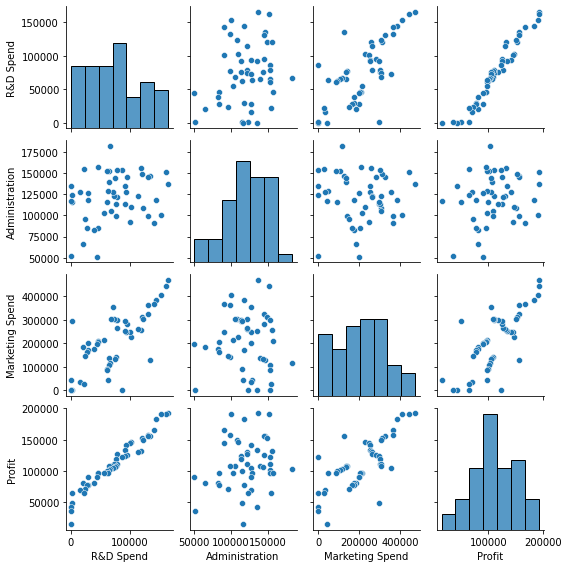

In [2]:
#Visualizing data
import seaborn as sns
sns.pairplot( dataset, height = 2, aspect = 1)
plt.show()

In [3]:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


labelencoder_x = LabelEncoder()
x[:, 3] = labelencoder_x.fit_transform(x[:, 3])


ct_x=ColumnTransformer(
    [("",OneHotEncoder(),[3])],
    remainder='passthrough'
 )
x=ct_x.fit_transform(x)


In [4]:
#avoide dummy variable trap
x=x[: , 1:]

In [5]:
#Splitting the Dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
#Feature Scaling
'''from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)'''

'from sklearn.preprocessing import StandardScaler\nsc_x=StandardScaler()\nx_train=sc_x.fit_transform(x_train)\nx_test=sc_x.transform(x_test)'

In [7]:
from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred = r.predict(x_test)

In [9]:
diff= y_test - y_pred
diff

array([   267.17840204,  11677.12239184,  13674.21154825,   5822.73148741,
        12512.90778946, -11152.93230163,  13377.36790324,  -1308.17374688,
        -3617.18533012,  -1733.1256955 ])

In [10]:
percent_diff = (diff / y_test) * 100
percent_diff

array([  0.2586873 ,   8.09453137,   9.35808176,   7.48434326,
         6.54953271, -10.62099971,  16.46869717,  -1.34194294,
        -3.27785372,  -1.04287092])

In [11]:
avg_diff = np.mean(diff)
print("Average Difference: {}($)".format(round(avg_diff, 2)))

Average Difference: 3952.01($)


In [12]:
avg_diff_percent = np.mean(percent_diff)
print("Average Difference Percent: {}%".format(round(avg_diff_percent, 2)))

Average Difference Percent: 3.19%


In [13]:
#Total Accuracy
total_accuracy = 100 - np.abs(avg_diff_percent)
print("Total Accuracy: {}%".format(round(total_accuracy, 2)))

Total Accuracy: 96.81%


BackWord Elimination


In [14]:
import statsmodels.api as SM
x = np.append(arr = np.ones((50,1)).astype(float),values=x,axis=1)


In [15]:
#building optimal model using backword elimination

x_opt = np.array(x[:, [0, 1, 2, 3, 4, 5]], dtype=int)

In [16]:
x_opt

array([[     1,      0,      1, 165349, 136897, 471784],
       [     1,      0,      0, 162597, 151377, 443898],
       [     1,      1,      0, 153441, 101145, 407934],
       [     1,      0,      1, 144372, 118671, 383199],
       [     1,      1,      0, 142107,  91391, 366168],
       [     1,      0,      1, 131876,  99814, 362861],
       [     1,      0,      0, 134615, 147198, 127716],
       [     1,      1,      0, 130298, 145530, 323876],
       [     1,      0,      1, 120542, 148718, 311613],
       [     1,      0,      0, 123334, 108679, 304981],
       [     1,      1,      0, 101913, 110594, 229160],
       [     1,      0,      0, 100671,  91790, 249744],
       [     1,      1,      0,  93863, 127320, 249839],
       [     1,      0,      0,  91992, 135495, 252664],
       [     1,      1,      0, 119943, 156547, 256512],
       [     1,      0,      1, 114523, 122616, 261776],
       [     1,      0,      0,  78013, 121597, 264346],
       [     1,      0,      1,

In [17]:
#OrdinaryLeastSquares
regressor_OLS = SM.OLS(endog=y, exog=x_opt).fit()

In [18]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.34e-27
Time:                        00:03:14   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.855      7.281      0.000    3.63e+04     6.4e+04
x1           198.7542   3371.026      0.059      0.953   -6595.103    6992.611
x2           -42.0063   3256.058     -0.013      0.990   -6604.161    6520.148
x3             0.8060      0.046     17.368      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.783   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.267
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
x_opt = np.array(x[:, [0, 1, 3, 4, 5]], dtype=int)
regressor_OLS = SM.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           8.49e-29
Time:                        00:03:14   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.901      7.537      0.000    3.67e+04    6.35e+04
x1           220.1847   2900.553      0.076      0.940   -5621.828    6062.197
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.759   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.173
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
x_opt = np.array(x[:, [0, 3, 4, 5]], dtype=int)
regressor_OLS = SM.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        00:03:14   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.384      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.839   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.443
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.587   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
x_opt = np.array(x[:, [0, 3, 5]], dtype=int)
regressor_OLS = SM.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           2.16e-31
Time:                        00:03:14   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.941     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.265      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.162
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
x_opt = np.array(x[:, [0, 3]], dtype=int)
regressor_OLS = SM.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           3.50e-32
Time:                        00:03:14   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.900     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.538
Skew:                          -0.911   Prob(JB):                     9.43e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X_new = np.array(x[:, [0 ,3]], dtype=int)
X_new

array([[     1, 165349],
       [     1, 162597],
       [     1, 153441],
       [     1, 144372],
       [     1, 142107],
       [     1, 131876],
       [     1, 134615],
       [     1, 130298],
       [     1, 120542],
       [     1, 123334],
       [     1, 101913],
       [     1, 100671],
       [     1,  93863],
       [     1,  91992],
       [     1, 119943],
       [     1, 114523],
       [     1,  78013],
       [     1,  94657],
       [     1,  91749],
       [     1,  86419],
       [     1,  76253],
       [     1,  78389],
       [     1,  73994],
       [     1,  67532],
       [     1,  77044],
       [     1,  64664],
       [     1,  75328],
       [     1,  72107],
       [     1,  66051],
       [     1,  65605],
       [     1,  61994],
       [     1,  61136],
       [     1,  63408],
       [     1,  55493],
       [     1,  46426],
       [     1,  46014],
       [     1,  28663],
       [     1,  44069],
       [     1,  20229],
       [     1,  38558],


In [34]:
#lets calculate accuracy after backword elimination
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(x_train,y_train)

y_pred = r.predict(x_test)
diff= y_test - y_pred
percent_diff = (diff / y_test) * 100

avg_diff_percent = np.mean(percent_diff)
print("Average Difference Percent: {}%".format(round(avg_diff_percent, 2)))

#Total Accuracy
total_accuracy = 100 - np.abs(avg_diff_percent)
print("Total Accuracy: {}%".format(round(total_accuracy, 2)))

Average Difference Percent: 3.52%
Total Accuracy: 96.48%


in this method our accuracy decreases from 96.81 to 96.48





Automatic Backword Elimination 

In [23]:
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = SM.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(int)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(int) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = np.array(x[:, [0, 1, 2, 3, 4, 5]], dtype=int)
X_new = backwardElimination(X_opt, SL)

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           3.50e-32
Time:                        00:03:14   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.900     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.538
Skew:                          -0.911   Prob(JB):                     9.43e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Backward Elimination with p-values and Adjusted R Squared:

In [25]:
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = SM.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = SM.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = np.array(x[:, [0, 1, 2, 3, 4, 5]], dtype=int)
X_Modeled = backwardElimination(X_opt, SL)

print(regressor_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           2.16e-31
Time:                        00:03:14   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.941     17.464      0.0

After Backword Elimination 
lets check accuracy of Model


In [26]:
X_Modeled

array([[     1, 165349, 471784],
       [     1, 162597, 443898],
       [     1, 153441, 407934],
       [     1, 144372, 383199],
       [     1, 142107, 366168],
       [     1, 131876, 362861],
       [     1, 134615, 127716],
       [     1, 130298, 323876],
       [     1, 120542, 311613],
       [     1, 123334, 304981],
       [     1, 101913, 229160],
       [     1, 100671, 249744],
       [     1,  93863, 249839],
       [     1,  91992, 252664],
       [     1, 119943, 256512],
       [     1, 114523, 261776],
       [     1,  78013, 264346],
       [     1,  94657, 282574],
       [     1,  91749, 294919],
       [     1,  86419,      0],
       [     1,  76253, 298664],
       [     1,  78389, 299737],
       [     1,  73994, 303319],
       [     1,  67532, 304768],
       [     1,  77044, 140574],
       [     1,  64664, 137962],
       [     1,  75328, 134050],
       [     1,  72107, 353183],
       [     1,  66051, 118148],
       [     1,  65605, 107138],
       [  

In [27]:
#Splitting the Dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_Modeled,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(x_train,y_train)

y_pred = r.predict(x_test)
diff= y_test - y_pred
percent_diff = (diff / y_test) * 100

avg_diff_percent = np.mean(percent_diff)
print("Average Difference Percent: {}%".format(round(avg_diff_percent, 2)))

#Total Accuracy
total_accuracy = 100 - np.abs(avg_diff_percent)
print("Total Accuracy: {}%".format(round(total_accuracy, 2)))


Average Difference Percent: 2.74%
Total Accuracy: 97.26%


At First we had 96.81% accuracy but Now we have 97.26%